# Resize de imagem

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as display
import PIL.Image


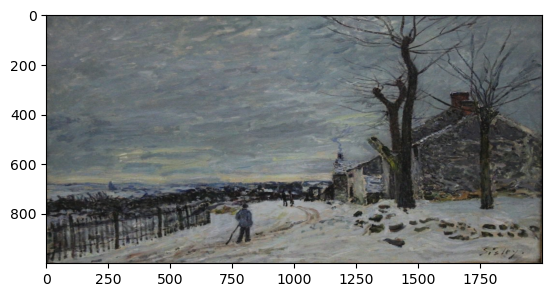

In [47]:
# Carrega a imagem em um tensor
img = tf.io.read_file("dataset\images\images\Alfred_Sisley\Alfred_Sisley_1.jpg")
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.convert_image_dtype(img, tf.float32)

# # Redimensiona a imagem para um tamanho fixo
img = tf.image.resize(img, [1000, 2000])



# Exibe a imagem
plt.imshow(img.numpy())
plt.show()